In [28]:
import mrcfile
import file
from pathlib import Path
import glob
import numpy as np
import image_process
import matplotlib.pyplot as plt
import cv2
from datacube import DataCube
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [29]:
paramK = np.loadtxt("./assets/Parameter_files/Kirkland_2010.txt")
azavg = np.loadtxt("./assets/Parameter_files/Amorphous_SiO2_azav_0.00167.txt")

In [30]:
elem1, elem2, elem3, elem4, elem5 = [14,8,0,0,0]
element_nums = np.array([elem1, elem2, elem3, elem4, elem5])

e1, e2, e3, e4, e5 = [1,2,0,0,0]
es = np.array([e1,e2,e3,e4,e5])

e_tot = np.sum(np.array(es))
e_ratio = es/e_tot

In [31]:
paramK_elems = paramK[element_nums,:]
paramK_elems[0]

array([1.06543892e+00, 1.04118455e+00, 1.20143691e-01, 6.87113368e+01,
       1.80915263e-01, 8.87533926e-02, 1.12065620e+00, 3.70062619e+00,
       3.05452816e-02, 2.14097897e-01, 1.59963502e+00, 9.99096638e+00])

In [32]:
ds = 0.00167 # ds = Calibration factor
start_num = 133
end_num = 2500
x = np.arange(start_num,end_num+1) # selected x ranges, end point = end point(eRDF) + 1
Iq = azavg[start_num-1:end_num]
q = x*ds*2*np.pi
s = q/2/np.pi
s2 = s**2

L = np.uint16(len(q))

In [33]:
def KirklandFactors(s2, paramK_element):
    a1,b1,a2,b2,a3,b3,c1,d1,c2,d2,c3,d3 = paramK_element
    f = (a1/(s2+b1))+(a2/(s2+b2))+(a3/(s2+b3))+(np.exp(-s2*d1)*c1)+(np.exp(-s2*d2)*c2)+(np.exp(-s2*d3)*c3)
    return np.array(f)
f = np.array([KirklandFactors(s2, paramK_elem) for paramK_elem in paramK_elems])

In [34]:
fq = np.sum( f * e_ratio[:,None], axis=0) # fq.shape = 2366,
fq_sq = fq**2
gq = np.sum( f**2 * e_ratio[:,None], axis=0)

In [35]:
# Auto Fit atomic scattering curve = N*gq+C
fullQRange = True
if fullQRange:
    AFrange=0
else:
    AFrange = 2/3*L
wi = np.ones((L,1))
wi[0:AFrange] = 0
qmax,qpos = q.max(),q.argmax() # qmax = q_fix
fqfit = gq[qpos]
iqfit = Iq[qpos]

array([ 1.39555829,  1.40605121,  1.41654413, ..., 26.21131282,
       26.22180574, 26.23229866])

In [36]:
a1 = np.sum(wi*gq*Iq)
a2 = np.sum(wi*Iq*fqfit)
a3 = np.sum(wi*gq*iqfit)
a4 = np.sum(wi)*fqfit*iqfit
a5 = np.sum(wi*gq**2)
a6 = 2*np.sum(wi*gq*fqfit)
a7 = np.sum(wi)*fqfit*fqfit

N = (a1-a2-a3+a4)/(a5-a6+a7)
C = iqfit-N*fqfit

Autofit = N*gq+C

SS = np.sum((Iq-Autofit)**2);

In [54]:
N

8682.499374427567

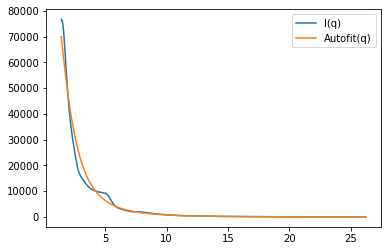

In [37]:
import matplotlib.pyplot as plt
plt.plot(q,Iq)
plt.plot(q,Autofit)
plt.legend(["I(q)","Autofit(q)"])

In [38]:
damping = 0.3
rmax = 10
dr = 0.01
r = np.arange(0.01,rmax+dr,dr) # rmax+dr to fit the eRDF

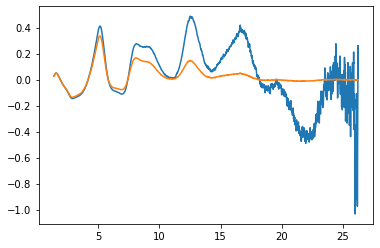

In [39]:
phiq = (Iq - Autofit)/(N*fq_sq) * s;
phiq_damp = phiq*np.exp(-s2*damping)
plt.plot(q,phiq)
plt.plot(q,phiq_damp)

In [44]:
N

8682.499374427567

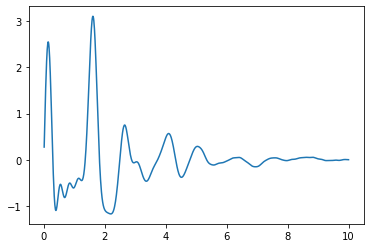

In [40]:
Gr = 4 * phiq_damp @ np.sin(q[:,None]*r) * (ds * 2 * np.pi)
plt.plot(r,Gr)

In [57]:
np.sin(q[:,None]*r).shape

(2368, 1000)

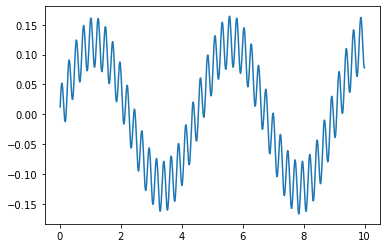

In [69]:
Gr = 4 * (np.sin(np.linspace(0,2368/2,2368))+np.sin(np.linspace(0,2368,2368))) @ np.sin(q[:,None]*r) * (ds * 2 * np.pi)
plt.plot(r,Gr)

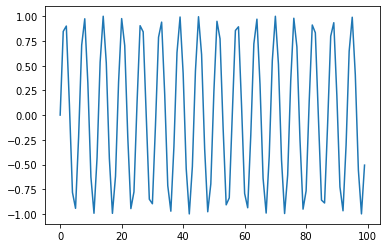

In [62]:
np.sin(np.linspace(0,100,100))

In [61]:
np.linspace(0,100,100)

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63